In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Library for computing figures of interest for cpw structures
import ResonatorOptimizer as ro

plt.style.use('seaborn-deep')

In [2]:
# Global Parameters
__er = 11.9
__fo = 9.5e09
__h = 500e-06
__t = 100e-09
# __pen_depth = 39e-09
# __total_width = 43.8e-06
# __total_width = 43.8e-06
__total_width_max = 150e-06
__length = 8102.64e-06

__keyind = lambda X,X_array: min(enumerate(X_array), key=lambda x: abs(x[1]-X))

In [9]:
w = 10e-06
g = .5*(__total_width_max - w)
l = __length
cpw = ro.CPW(width=w, gap=g, length=l, elen=180, fo=__fo, er=__er, h=__h, t=__t)
cpw.impedance_geometric()

103.39152588709328

In [11]:
wtot = np.arange(2,101,1)*1e-06
w = 2e-06
g = [.5*(wtot[i] - w) for i in range(len(wtot))]
l = __length
cpw = [ro.CPW(width=w, gap=g[i], length=l, elen=180, fo=__fo, er=__er, h=__h, t=__t) for i in range(len(g))]

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/conformalmapping.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [14]:
Z = [cpw[i].impedance_geometric() for i in range(1,len(g))]
L = [cpw[i].geometric_inductance_per_length() for i in range(1,len(g))]

# fo = [cpw[i].resonant_freq() for i in range(1,len(g))]
# elen = [l / cpw[i].wavelength() for i in range(1,len(g))]
# vp = [l / cpw[i].phase_velocity() for i in range(1,len(g))]

In [15]:
dic = {'TotalWidth':wtot[1:len(wtot)]*1e06, 
       'Z':Z, 
       'L':[L[i]*1e06 for i in range(len(L))]}
cpw_data = pd.DataFrame(data=dic)


val = cpw_data.TotalWidth[np.abs(cpw_data.TotalWidth - 80).idxmin()]
colors = ['red' if wtot  ==  val else 'steelblue' 
        for wtot in zip(cpw_data.TotalWidth)]

In [16]:
cpw_data

,TotalWidth,Z,L
0,3.0,39.292429,0.332635
1,4.0,48.864558,0.413669
2,5.0,55.603746,0.470720
3,6.0,60.863350,0.515246
4,7.0,65.188680,0.551862
...,...,...,...
93,96.0,131.798066,1.115752
94,97.0,132.050637,1.117890
95,98.0,132.300609,1.120006
96,99.0,132.548038,1.122101


In [61]:
w = np.linspace(1e-06,150e-06,100)
wtot = [np.linspace(w[i],__total_width_max,100) for i in range(len(w))]

warray = np.repeat(w,np.shape(wtot)[1])
wtot_array = np.concatenate((([wtot[i] for i in range(np.shape(wtot)[0])])))
g = [.5*(wtot_array[i] - warray[i]) for i in range(len(warray))]

dic = {'w':np.round(warray,6),
      'TotalWidth':np.round(wtot_array,6),
      'g':g}
df = pd.DataFrame(data=dic)

cpw = [ro.CPW(width=warray[i], gap=g[i], length=l, elen=180, 
              fo=__fo, er=__er, h=__h, t=__t) for i in range(len(warray))]

Z = [cpw[i].impedance_geometric() for i in range(len(cpw))]
# L = [cpw[i].geometric_inductance_per_length() for i in range(len(cpw))]
# fo = [cpw[i].resonant_freq() for i in range(len(cpw))]
# vp = [cpw[i].phase_velocity() for i in range(len(cpw))]

df['Z'] = Z
# df['L'] = L
# df['fo'] = fo
# df['vp'] = vp

# df.TotalWidth = df.TotalWidth*1e06
# df.L = df.L*1e06
# df.fo = df.fo*1e-09

df = df.dropna()

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ResonatorOptimizer-0.1.0-py3.6.egg/ResonatorOptimizer/cpwcalcs/conformalmapping.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [62]:
val_w = df.w[np.abs(df.w - 50e-06).idxmin()]
val_wt = df.TotalWidth[np.abs(df.TotalWidth - 80e-06).idxmin()]
colors = ['black' if w==val_w and wtot==val_wt else 'red' if w==val_w else 'steelblue'  
        for w,wtot in zip(df.w,df.TotalWidth)]

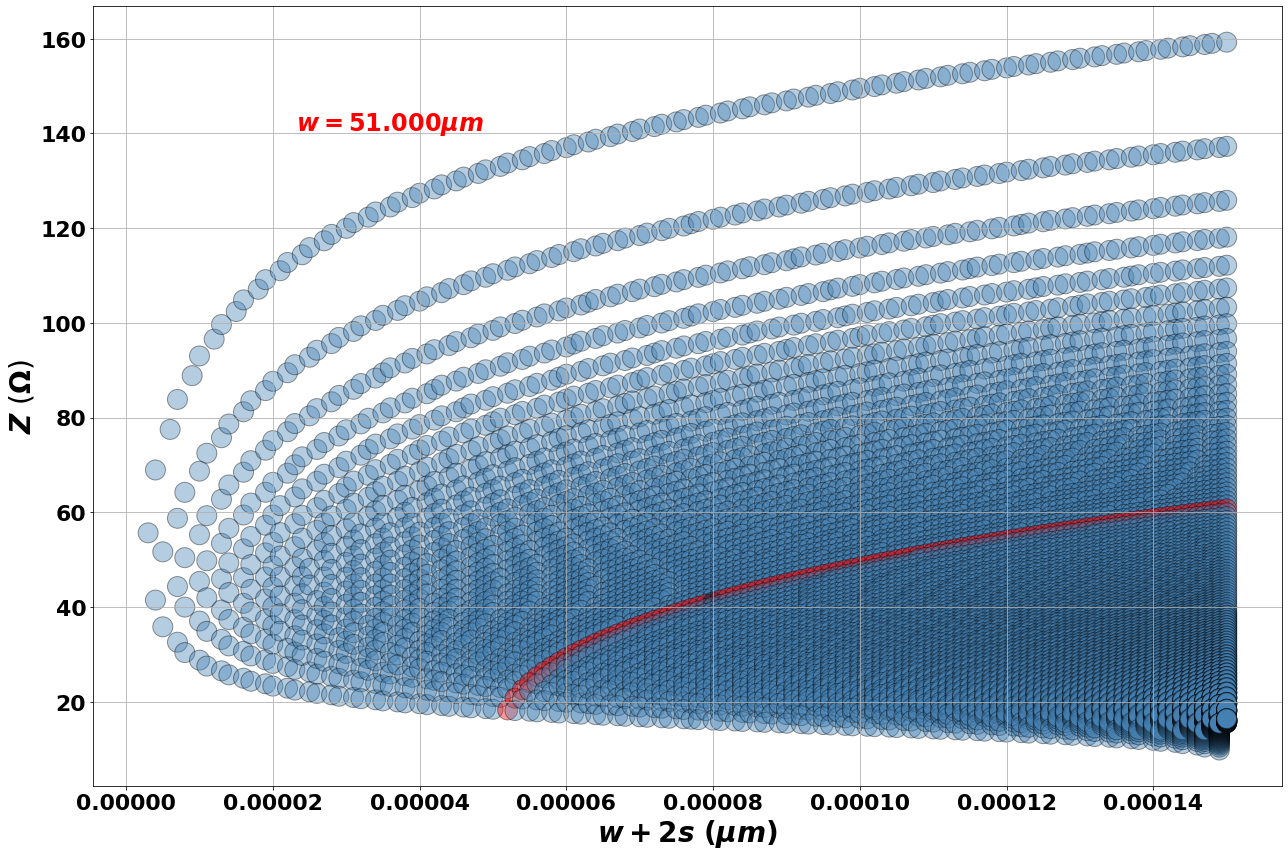

In [63]:
fig,ax0 = plt.subplots(figsize=(18,12))

sns.regplot(x="TotalWidth", 
            y="Z",
            data=df,
            fit_reg = False,
            scatter_kws = {'facecolors':colors,'s':400,'edgecolor':'k', 'alpha':.4})
plt.grid()
plt.xlabel('$w + 2s$ $(\mu m)$')
plt.ylabel('$Z$ ($\Omega$)')
plt.text(.25,.85,'$w = {:.3f} \mu m$'.format(val_w*1e06),color='red',fontsize=24,horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes)

plt.tight_layout()
plt.show()

# Cavity Section

In [119]:
w = 72e-06
# g = .5*(__total_width_max - w)
g = .5*(150e-06 - w)
l = __length
cpw = ro.CPW(width=w, gap=g, length=l, elen=180, fo=__fo, er=__er, h=__h, t=__t)
z = cpw.impedance_geometric()

print('wcav = ' + str(w))
print('gcav = ' + str(g))
print('Zcav = ' + str(z))

wcav = 7.2e-05
gcav = 3.899999999999999e-05
Zcav = 50.347700915219676


# LowZ Section

In [127]:
w = 140e-06
# g = .5*(__total_width_max - w)
g = .5*(150e-06 - w)
l = __length
cpw = ro.CPW(width=w, gap=g, length=l, elen=90, fo=__fo, er=__er, h=__h, t=__t)
z = cpw.impedance_geometric()

print('wlow = ' + str(w))
print('glow = ' + str(g))
print('Zlow = ' + str(z))

2*g + w

wlow = 0.00014
glow = 4.9999999999999996e-06
Zlow = 23.535241232122857


0.00015

# HighZ Section

In [126]:
w = 10e-06
# g = .5*(__total_width_max - w)
g = .5*(150e-06 - w)
l = __length
cpw = ro.CPW(width=w, gap=g, length=l, elen=90, fo=__fo, er=__er, h=__h, t=__t)
z = cpw.impedance_geometric()

print('whigh = ' + str(w))
print('ghigh = ' + str(g))
print('Zhigh = ' + str(z))

whigh = 1e-05
ghigh = 7e-05
Zhigh = 103.39152588709328


In [100]:
def choose_Z(df=df,Z=50,inp='TotalWidth',val=80e-06):
    return df.TotalWidth[np.where(df[inp]==val)[0]]
    
Zchosen = choose_Z(df=df,Z=50,inp='TotalWidth',val=150e-06)
Zchosen

pd.set_option('display.max_rows', 10000)
df.TotalWidth[np.where(df.TotalWidth==150e-06)[0]]

locw = np.where(df.w==51e-06)[0]
locwt = np.abs(df.TotalWidth-150e-05)

# locw
# df.loc[min(locr):max(locr)]

/Users/garethjones/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [101]:
# df.loc[Zchosen[1]]
df.loc[Zchosen.index[0]]

w               0.000001
TotalWidth      0.000148
g               0.000074
Z             159.025008
Name: 98, dtype: float64

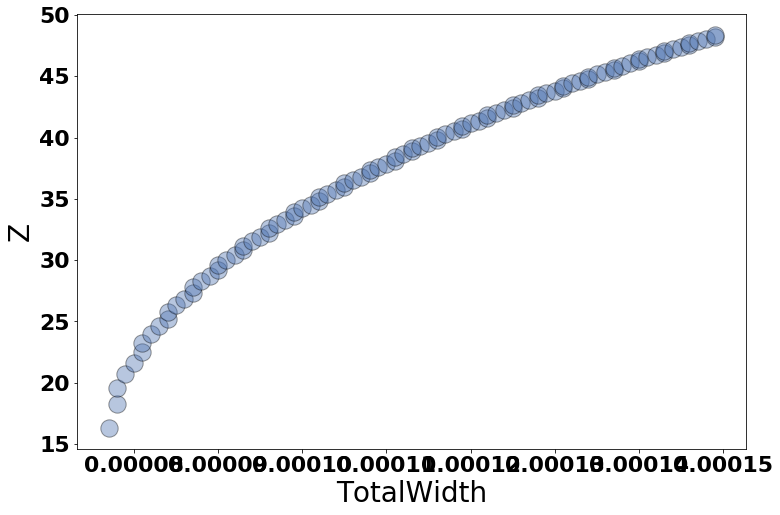

In [107]:
w_chosen = df.w[Zchosen.index[50]]
loc = np.where(df.w==w_chosen)[0]

plt.figure(figsize=(12,8))
sns.regplot(x="TotalWidth",
           y = "Z",
           data=df[min(loc):max(loc)],
           fit_reg=False,
           scatter_kws = {'edgecolor':'k','s':300, 'alpha':0.4})

plt.show()